#Mouse Navigating Maze in Virtual Reality

## Setup evnironment and plotting

In [2]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set_context('notebook')

## Load covariates and maze information

In [3]:
basePath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-example'

In [4]:
with open(os.path.join(basePath,'covariates.json')) as fp:    
    params = pd.DataFrame(json.load(fp))

In [5]:
maze = np.load(os.path.join(basePath,'maze.npy')).transpose(2, 0, 1)
reward = np.load(os.path.join(basePath,'reward.npy'))

## Plot maze and trajectory through maze

A maze consists of trapazoidal patches, called `branches`, which are stiched together.

There is also one reward location, which is also a trapazoidal patch.

In [6]:
def draw(maze, reward):
    for branch in maze:
        plt.fill(branch[0,:], branch[1,:], edgecolor=[0.7,0.7,0.7], facecolor=[0.7,0.7,0.7], lw=1.5);
    plt.fill(reward[0], reward[1], edgecolor=[0.9,0.9,0.9], facecolor=[0.9,0.9,0.9]);
    plt.axis('off')
    #print branch

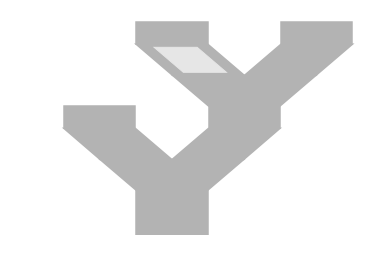

In [7]:
draw(maze, reward)

In [8]:
def trace(params, trial):
    if not isinstance(trial, (list, tuple)):
        trial = [trial]
    for t in trial:
        plt.plot(params.xMazePos[params.trialNum == t],params.yMazePos[params.trialNum == t]);
        print t

2


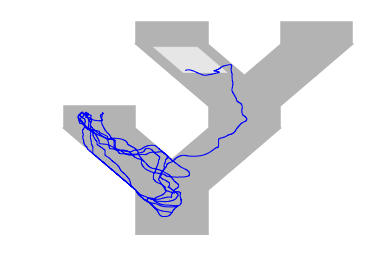

In [9]:
draw(maze, reward)
trace(params, 2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


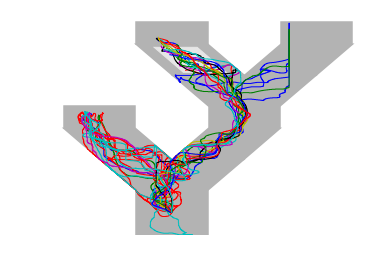

In [10]:
draw(maze, reward)
trace(params, range(0,18))

In [11]:

params

,corPos,corWidth,deadEnd,itiPeriod,trialNum,trialWater,xMazePos,xSpeed,yMazePos,ySpeed
0,15.0,30,0,1,0,0,0.0,19.7365,10.0,-0.5054
1,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
2,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
3,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
4,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
5,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
6,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
7,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170
8,15.0,30,0,1,0,0,0.0,23.6971,10.0,-0.6178
9,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170


In [15]:
params['corNorm'] = params.corPos/params.corWidth

In [15]:
trials = params.groupby(params.trialNum).mean()

In [16]:
trials

,corPos,corWidth,deadEnd,itiPeriod,trialWater,xMazePos,xSpeed,yMazePos,ySpeed
trialNum,,,,,,,,,
0,19.854556,35.629603,0.151202,0.052247,0.005225,12.432706,5.032982,55.610136,0.172113
1,20.845674,35.113057,0.076643,0.086700,0.008497,-3.853858,7.534391,40.259667,0.206092
2,20.200409,33.380491,0.188987,0.031466,0.003084,-13.500151,2.462828,37.433889,0.489724
3,18.762935,33.392648,0.000000,0.152532,0.014948,10.551769,12.986398,42.176083,1.505953
4,18.038397,33.307530,0.000000,0.162285,0.015904,11.092730,14.338710,43.051217,1.779572
5,18.279575,33.475146,0.000000,0.183016,0.017936,8.956186,17.158472,41.385615,1.500996
6,17.294090,34.156348,0.014697,0.156348,0.015322,11.049031,13.919894,48.671639,0.405643
7,17.801972,35.163955,0.104281,0.088826,0.008705,26.309220,7.734377,58.615633,0.480758
8,19.170602,35.970203,0.074538,0.090678,0.008886,22.463366,8.275846,56.338955,0.581507


In [17]:
plt.hist(trials.corNorm)

AttributeError: 'DataFrame' object has no attribute 'corNorm'

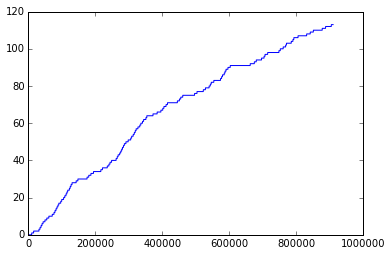

In [18]:
plt.plot(params.trialNum)

In [19]:
params

,corPos,corWidth,deadEnd,itiPeriod,trialNum,trialWater,xMazePos,xSpeed,yMazePos,ySpeed
0,15.0,30,0,1,0,0,0.0,19.7365,10.0,-0.5054
1,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
2,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
3,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
4,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
5,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
6,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
7,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170
8,15.0,30,0,1,0,0,0.0,23.6971,10.0,-0.6178
9,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170


In [20]:

len(params)

909958

In [ ]:
plt.plot(maze[2].T)

In [ ]:
maze


In [ ]:
#LOL pls don't touch this if you value your time
import matplotlib.path as mPath
def find_pt(params):
    r1 = mPath.Path(np.array(maze[0].T))
    r2 = mPath.Path(np.array(maze[1].T))
    r3 = mPath.Path(np.array(maze[2].T)) #first left incorrect branch
    r4 = mPath.Path(np.array(maze[3].T))
    r5 = mPath.Path(np.array(maze[4].T))
    r6 = mPath.Path(np.array(maze[5].T))
    r7 = mPath.Path(np.array(maze[6].T))
    r8 = mPath.Path(np.array(maze[7].T))
    r9 = mPath.Path(np.array(maze[8].T)) #right right incorrect branch
    r10 = mPath.Path(np.array(maze[9].T))
    r11 = mPath.Path(np.array(maze[10].T))
    
    allpts = np.array([[params.xMazePos],[params.yMazePos]])
    ops = allpts.T
    for i in range(len(params)):
        print i
        POI = (ops[i][0][0],ops[i][0][1])
        if r1.contains_point(POI):
            params['Region'][i] = 1
            continue
        elif r2.contains_point(POI):
            params['Region'][i] = 2
            continue
        elif r3.contains_point(POI):
            params['Region'][i] = 3
            continue
        elif r4.contains_point(POI):
            params['Region'][i] = 4
            continue
        elif r5.contains_point(POI):
            params['Region'][i] = 5
            continue
        elif r6.contains_point(POI):
            params['Region'][i] = 6
            continue
        elif r7.contains_point(POI):
            params['Region'][i] = 7
            continue
        elif r8.contains_point(POI):
            params['Region'][i] = 8
            continue
        elif r9.contains_point(POI):
            params['Region'][i] = 9
            continue
        elif r10.contains_point(POI):
            params['Region'][i] = 10
            continue
        elif r11.contains_point(POI):
            params['Region'][i] = 11
            continue
            

find_pt(params) 

In [23]:
import matplotlib.path as mPath

#classification of points to a region
    
def classify(POI, regions):
   
    for i in range(len(regions)):
        if regions[i].contains_point(POI):
            return i+1
    return 0

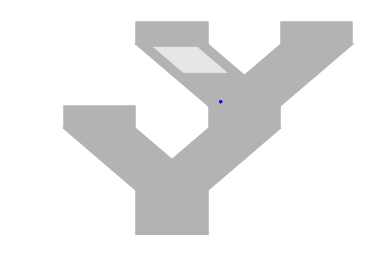

In [24]:
draw(maze, reward)
plt.plot(20,60, '.')

In [25]:
#CLASSIFY ALL DATA POINTS_ in a reasonable amount of time :)
regions = [mPath.Path(np.array(x.T)) for x in maze]

allpts = zip(params.xMazePos.values, params.yMazePos.values)

ids = map(lambda x: classify(x, regions), allpts)

params['Region'] = ids



In [170]:
params

,corPos,corWidth,deadEnd,itiPeriod,trialNum,trialWater,xMazePos,xSpeed,yMazePos,ySpeed,corNorm,Region
0,15.0,30,0,1,0,0,0.0,19.7365,10.0,-0.5054,0.500000,1
1,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
2,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
3,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
4,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
5,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
6,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
7,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170,0.500000,1
8,15.0,30,0,1,0,0,0.0,23.6971,10.0,-0.6178,0.500000,1
9,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170,0.500000,1


In [26]:
trials = params.groupby(params.trialNum).mean()

In [27]:
#Classfied whole trials as correct/incorrect

def correct(params,trials= params.groupby(params.trialNum).mean()):
    numtrials = max(params.trialNum)+1
    check = []
    for t in range(numtrials):
        in3 = params.Region[params.trialNum == t].isin([3]).any()
        in9 = params.Region[params.trialNum == t].isin([9]).any()
        check.append(in3 or in9)
    return check
#In which returning True = incorrect/deviating trajectory
#                   False = correct trajectory
            
correct(params) 


[True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False]

In [28]:
trials['Incorrect'] = correct(params)

(-0.5, 1.5)

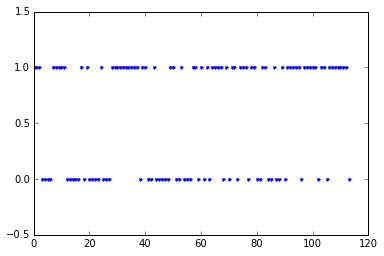

In [29]:
plt.plot(trials.Incorrect,'.')
plt.ylim((-0.5,1.5))

In [30]:
print correct(params).count(False)
print correct(params).count(True)

48
66


In [31]:
#Determine left/right FIRST choices for this two choice point maze

def trajectory(params,trials= params.groupby(params.trialNum).mean()):
    numtrials = max(params.trialNum)+1
    traj_array = []
    for t in range(numtrials):
        traj = ''
        in3 = params.Region[params.trialNum == t].isin([3]).any() #1L
        in4 = params.Region[params.trialNum == t].isin([4]).any() #1R
        in8 = params.Region[params.trialNum == t].isin([8]).any() #2L--all trials will reach 8
        in9 = params.Region[params.trialNum == t].isin([9]).any() #2R
        
        if in3:
            traj+='L'
        else:
            traj+='R'
            
        if in9:
            traj+='R'
        else:
            traj+='L'
            
        traj_array.append(traj)
        
    return traj_array    

trajectory(params)
trials['Trajectory'] = trajectory(params)

In [33]:
trials.Trajectory

trialNum
0      LR
1      LL
2      LL
3      RL
4      RL
5      RL
6      RL
7      RR
8      RR
9      LL
10     LL
11     LL
12     RL
13     RL
14     RL
15     RL
16     RL
17     LL
18     RL
19     LL
20     RL
21     RL
22     RL
23     RL
24     LL
25     RL
26     RL
27     RL
28     LR
29     LL
       ..
84     RL
85     RL
86     RR
87     RL
88     RL
89     LL
90     RL
91     RR
92     RR
93     LL
94     RR
95     LL
96     RL
97     RR
98     LL
99     RR
100    LL
101    LL
102    RL
103    RR
104    LL
105    RL
106    RR
107    LR
108    RR
109    RR
110    LR
111    RR
112    LL
113    RL
Name: Trajectory, dtype: object